# Машинное обучение, ФЭН ВШЭ

# Практическое задание 3

Выполнила Головина Мария, БЭК145, 4-сложная


## SVM

>**1. (0.5 баллов)** Сгенерируйте три случайные двумерные выборки для бинарной классификации (хотя бы по 400 точек в каждой):
- с линейно разделимыми классами;
- с хорошо разделимыми классами, но не линейно разделимыми;
- с плохо разделимыми классами.

>Визуализируйте полученные выборки на плоскости.

>Для генерации случайной выборки можно использовать функции из модуля [sklearn.datasets](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets).

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn import datasets
import numpy as np
import itertools
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

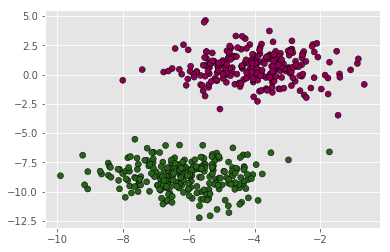

In [2]:
# линейно разделимая выборка

x1, y1 = datasets.make_blobs(n_samples=500, n_features=2, centers=2, cluster_std=1.2, random_state = 17) 
plt.scatter(x1[:, 0], x1[:, 1], c = y1, cmap = 'PiYG', edgecolors = 'black');

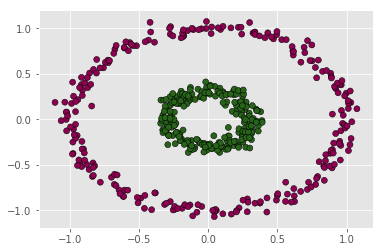

In [22]:
# нелинейно разделимая выборка

x2, y2 = datasets.make_circles(n_samples=500, shuffle=True, noise=0.05, factor = 0.3, random_state = 7)
plt.scatter(x2[:,0], x2[:,1], c = y2, cmap = 'PiYG', edgecolors = 'black');

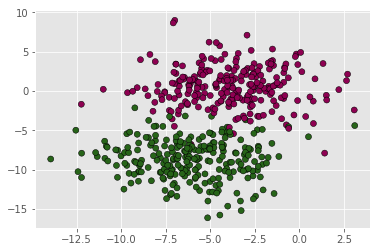

In [4]:
# плохо разделяемые классы

x3, y3 = datasets.make_blobs(n_samples=500, n_features=2, centers=2, cluster_std=2.5, random_state = 17)
plt.scatter(x3[:,0], x3[:,1], c = y3, cmap = 'PiYG', edgecolors = 'black');

>Рассмотрим(https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture13-features.pdf) двойственную задачу метода опорных векторов:
$$\begin{cases}
\sum_{i=1}^l \lambda_i - \frac{1}{2} \sum_{i, \, j =1}^l \lambda_i \lambda_j y_i y_j \langle x_i, x_j\rangle \to \max_\lambda,\\
0 \le \lambda_i \le C, i = \overline{1, l},\\
\sum_{i=1}^l \lambda_i y_i = 0.
\end{cases}$$

>После решения данной задачи прогнозы для новых объектов строятся следующим образом: $a(x) = \text{sign} \left( \sum_{i=1}^l \lambda_i y_i \langle x_i, x \rangle + b \right).$

>Заметим, что и оптимизационная задача, и формула итогового классификатора зависят лишь от скалярных произведений объектов, а потому в данном методе можно использовать ядра для восстановления нелинейных зависимостей.

>**2. (1.5 балла)** Обучите на сгенерированных ранее двумерных выборках [ядровой SVM](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) с использованием следующих типов ядер (для различных значений гиперпараметра $C$):
- линейное: $K(x, z) = \langle x, z \rangle$;
- полиномиальное: $K(x, z) = (\gamma \langle x, z \rangle + 1)^d$ (для различных значений $\gamma, d$);
- гауссовское: $K(x, z) = \exp(-\gamma \|x - z\|^2)$ (для различных значений $\gamma$).

>Визуализируйте разделяющую поверхность и разделяющую полосу:
 - для модели с линейным ядром для различных значений $C$;

Для начала напишем функцию, которая поможет визуализировать разделяющую прямую и разделяющую полосу.

In [5]:
def decision_boundary_2D(clf, d1, d2, axes = None, figw = 4, figh = 4, highlight = True):
    clf.fit(d1, d2) # для двумерной функции
    if highlight: # выделение цветом вершин векторов, выбранных опорными (полупрозрачный розовый ореол)
        plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s = 200, facecolors = 'hotpink', alpha = 0.5, edgecolors = 'black');
    plt.scatter(d1[:, 0], d1[:, 1], c = d2, cmap='PiYG', s = 50, edgecolors = 'black')
    if axes is None:
        figure, axes = plt.gcf(), plt.gca()
    figure.set_size_inches(figw, figh)
    xx = np.linspace(plt.xlim()[0], plt.xlim()[1], 30) # задаём границы области, отрезок разделяющей прямой на которой будем визуализировать 
    yy = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(yy, xx)
    Z = np.zeros_like(X)
    for i, x_i in enumerate(xx): # строим разделяющую прямую
        for j, y_j in enumerate(yy):
            Z[i, j] = clf.decision_function([x_i, y_j])
    axes.contour(X, Y, Z, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--']) # пунктиром показаны границы полосы, сплошной линией – разделяющая прямая

Для ряда C визуализируем разделяющую прямую и полосу на выборке с линейно разделимыми классами. Заметно, что с ростом С полоса сужается, но сама разделяющая прямая не меняет своего положения, поскольку для такой задачи она единственна и вычисляется по опорным объектам с последнего графика. Оптимальным значением C из рассмотренных можно считать C = 10. Выделенные объекты используются при минимизации margin.

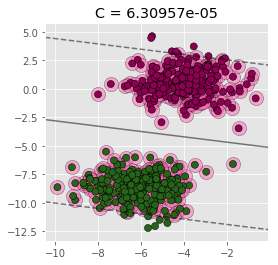

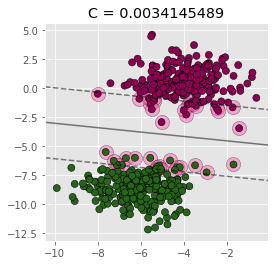

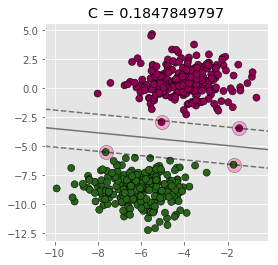

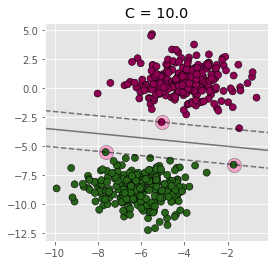

In [7]:
from sklearn.svm import SVC
C_values = np.logspace(-4.2, 1, 4)

for C in C_values:
    axes = plt.subplots(1)
    clf = SVC(kernel='linear', C = C)
    decision_boundary_2D(clf, d1 = x1, d2 = y1, figw = 4, figh = 4)
    plt.title('C = {}'.format(round(C, 10)))

Плохо разделяемая выборка:

Разделяющая прямая не позволяет точно класифицировать все объекты. Много объектов попало в разделяющую полосу, а некоторые классифицированы неправильно

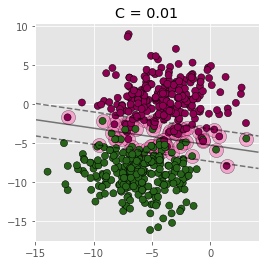

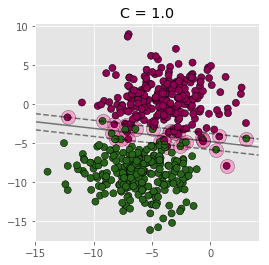

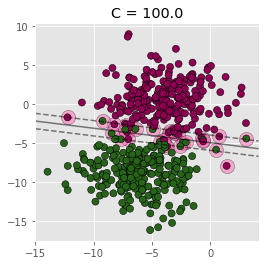

In [8]:
C_values = np.logspace(-2, 2, 3)
for C in C_values:
    axes = plt.subplots(1)
    clf = SVC(kernel='linear', C = C)
    decision_boundary_2D(clf, d1 = x3, d2 = y3, figw = 4, figh = 4)
    plt.title('C = {}'.format(round(C, 10)))

Для нелинейно разделимой выборки линейное ядро, очевидно, не подходит:

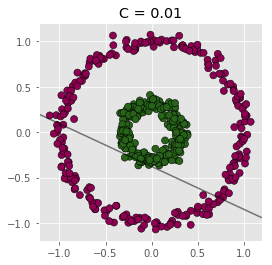

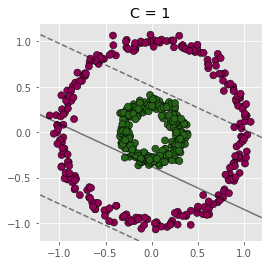

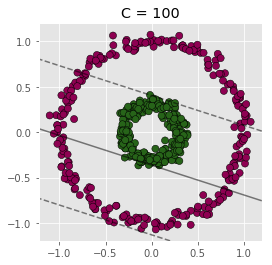

In [24]:
C_values = [0.01, 1, 100]

for C in C_values:
    axes = plt.subplots(1)
    clf = SVC(kernel='linear', C = C)
    decision_boundary_2D(clf, d1 = x2, d2 = y2, figw = 4, figh = 4, highlight = False)
    plt.title('C = {}'.format(round(C, 10)))

>Визуализируйте разделяющую поверхность и разделяющую полосу:
 - для моделей, использующих полиномиальное и гауссовское ядро, соответствующих недообучению, нормальному поведению и переобучению.

### Недообучение:

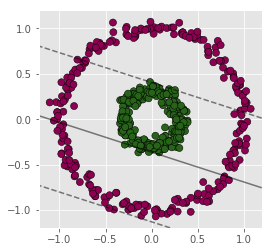

In [25]:
poly = SVC(kernel='poly', degree=1, gamma=6)
decision_boundary_2D(poly, d1 = x2, d2 = y2, highlight = False)

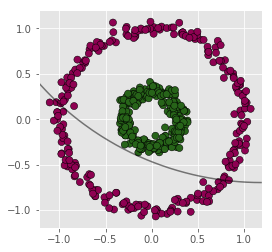

In [26]:
rbf = SVC(kernel='rbf', gamma=0.001)
decision_boundary_2D(rbf, d1 = x2, d2 = y2, highlight = False)

### Нормальное поведение:

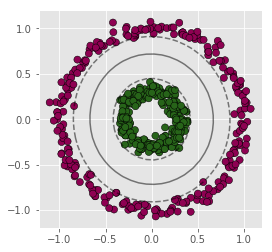

In [27]:
poly = SVC(kernel='poly', degree=2, gamma=6)
decision_boundary_2D(poly, d1 = x2, d2 = y2, highlight = False)

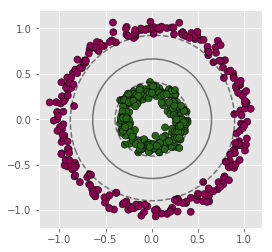

In [73]:
rbf = SVC(kernel='rbf', gamma=1, C = 2)
decision_boundary_2D(rbf, d1 = x2, d2 = y2, highlight = False)

### Переобучение:

Слишком высокая степень полинома в ядре приводит к переобучению

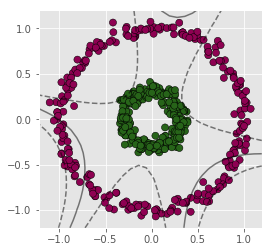

In [29]:
poly = SVC(kernel='poly', degree = 3, gamma = 3)
decision_boundary_2D(poly, d1 = x2, d2 = y2, highlight = False)

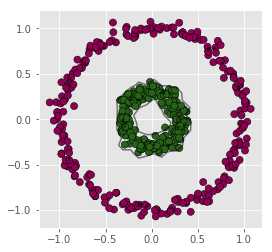

In [34]:
rbf = SVC(kernel='rbf', gamma = 900)
decision_boundary_2D(rbf, d1 = x2, d2 = y2, highlight = False)

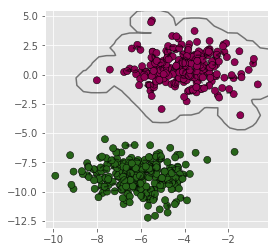

In [35]:
rbf = SVC(kernel='rbf', gamma = 7)
decision_boundary_2D(rbf, d1 = x1, d2 = y1, highlight = False)

>**3. (1 балл)** Ответьте на следующие вопросы:
> - Как ведет себя SVM с полиномиальным ядром в зависимости от значений гиперпараметра $C$, степени ядра $d$ и параметра $\gamma$?
- Как ведет себя SVM с гауссовским ядром в зависимости от значений гиперпараметра $C$ и $\gamma$?

SVM с гауссовским ядром более точно подгоняется под обучающую выборку (переобучается) при больших $\gamma$. Если $\gamma$ слишком большая, радиус зоны воздействия на опорные вектора включает только сами опорные вектора, и регуляризация становится неэффективной в борьбе с переобучением. Когда $\gamma$ слишком маленькая, модель слишком ограничена и не может передать сложность, или форму, данных.
Чем больше C, тем важнее для нас правильно классифицировать как можно больше объектов, даже если ценой этому будет очень маленькая разделяющая полоса. При этом маленькие значения C приводят к тому, что разделяющая прямая выбирается так, что у неё шире разделяющая полоса (отступ больше), но некоторые объекты могут при этом быть неправильно классифицированы. Во многих случаях делается выбор в пользу более маленького значения C, поскольку это позволяет сохранить общность.

SVM с полиномиальным ядром в зависимости от уже описанных параметров $C, \gamma$ ведёт себя так же. Большие значения параметра $d$, означающего степень полинома, позволяют получить более сложную форму разделяющей прямой или плоскости, то есть более точно подогнаться под обучающую выборку, что может привести к переобучению.

>**4. (1.5 балл)** Обучите модели с использованием ядер из п. 2 для задачи бинарной классификации [Predicting a Biological Response](https://www.kaggle.com/c/bioresponse) (используйте файл train.csv) для значения $C=1.$ Для оценки качества разбейте выборку на обучающую и тестовую в отношении 50/50.

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

d = pd.read_csv('train.csv')
y = d.Activity
X = d.drop(['Activity'], axis = 1)
Xtr, Xtest, ytr, ytest = train_test_split(X, y, test_size = 0.5)

In [40]:
accuracy_score(y_true = ytest, y_pred = SVC(kernel = 'linear', C = 1).fit(Xtr, ytr).predict(Xtest))

0.72121535181236673

In [42]:
accuracy_score(y_true = ytest, y_pred = SVC(kernel = 'poly', C = 1).fit(Xtr, ytr).predict(Xtest))

0.53624733475479747

In [41]:
accuracy_score(y_true = ytest, y_pred = SVC(kernel = 'rbf', C = 1).fit(Xtr, ytr).predict(Xtest))

0.71108742004264391

>Постройте модель, позволяющую достичь значения accuracy, равного 0.75, на тестовой выборке. Позволяет ли использование ядер достичь лучшего качества по сравнению с линейной моделью?

С помощью GridSearchCV подберём наилучшие параметры из переданных. Обучение на большом датасете занимает много времени, в связи с чем были взяты такие небольшие диапазоны значений параметров (основная цель -- превысить порог точности в 0.75). Для более устойчивых результатов усредняем значения точности по кросс-валидации.

------
#### Linear Kernel

In [51]:
from sklearn.model_selection import GridSearchCV

gs_linear = GridSearchCV(SVC(kernel = 'linear'), param_grid = {'C': np.logspace(-3, -1, 3)}, cv = 3).fit(Xtr, ytr)
gs_linear_pred = gs_linear.predict(Xtest)
accuracy_score(y_true = ytest, y_pred = gs_linear_pred)

0.75852878464818763

In [24]:
gs_linear.best_estimator_

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

----
#### Polynomial Kernel

In [64]:
degree_range = [3, 4, 5, 6, 7]
gamma_range = [0.1, 1]
param_grid = dict(degree = degree_range, gamma = gamma_range)
gs_poly = GridSearchCV(SVC(kernel = 'poly'), param_grid = param_grid, cv = 3).fit(Xtr, ytr)

In [65]:
gs_poly_pred = gs_poly.predict(Xtest)
accuracy_score(y_true = ytest, y_pred = gs_poly_pred)

0.75639658848614078

In [66]:
gs_poly.best_estimator_

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=7, gamma=0.1, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

----
#### Gaussian Kernel

In [140]:
gamma_range = [0.001, 0.01, 0.1, 1]
param_grid = dict(C = [0.1, 1], gamma = gamma_range)
gs_rbf = GridSearchCV(SVC(kernel = 'rbf'), param_grid = param_grid, cv = 3).fit(Xtr, ytr)

In [141]:
gs_rbf_pred = gs_rbf.predict(Xtest)
accuracy_score(y_true = ytest, y_pred = gs_rbf_pred)

0.77771855010660984

 #### Выводы:

Результаты SVM с RBF превзошли линейную модель. Вообще 
    [линейное ядро можно считать вырожденной версией гауссовского, и лучше всего затюненное RBF показывает точность выше лучше всего затюненного линейного ядра](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.141.880&rep=rep1&type=pdf). Результаты лучшей модели с полиномиальным ядром близки к результатам лучшей линейной модели (с C= 0.01), возможно, был выбран неудачный диапазон параметров, но скорее всего из-за того, что использованы данные с изначально большой размерностью (1776 признаков), увеличение размерности не так полезно, поэтому линейное ядро само по себе показывает хорошие результаты, сохраняя при этом бОльшую общность, чем полиномиальное.

## SVD

>Скачайте картинку и положите в каталог рядом с ноутбуком:

In [183]:
from PIL import Image
from scipy import misc
import matplotlib.pyplot as plt
import sys
%matplotlib inline

img = misc.imread(r'art.jpg')

>Посмотрим на нее:

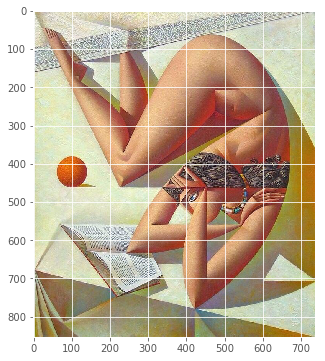

In [184]:
plt.figure(figsize=(14,6))
plt.imshow(img);

>Для удобства оставим только один канал.

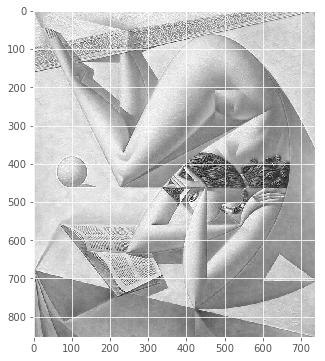

In [185]:
plt.figure(figsize=(14,6))
img = img[:,:,0]
plt.imshow(img, cmap='gray');

>**5. (1 балла)** 

>Главные компоненты - это матрицы вида  $u_i\sigma_iv_i^T$, где  $u_i, v_i$ это столбцы матриц $U$ и $V$ из сингулярного разложения; $\sigma_i$ соответсвующее сингулярное число. Визуализуйте первые и последние несколько компонент. Сделайте выводы.

In [149]:
imgs = (img - img.mean(axis=0))
U, s, V = np.linalg.svd(imgs, compute_uv=True)
# plt.imshow(V[:150], cmap = 'gray');

Визуализировав первые n и последние n главных компонент, видим, что основная информация об изображении содержится среди первых компонент, а последние не несут никакой информации о нём:

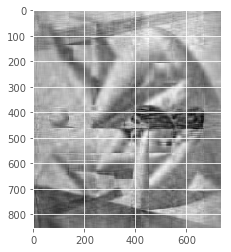

In [150]:
plt.imshow(np.dot(U[:, :20]*s[:20], V[:20]), cmap = 'gray');

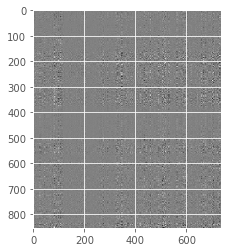

In [151]:
plt.imshow(np.dot(U[:, 833:853]*s[716:736], V[716:736]), cmap = 'gray');

>**6. (1 балл)** 

>Как вам кажется, сколько первых компонент нужно взять для достаточно хорошего восстановления исходного изображения? Используйте график объясненной дисперсии для вашего выбора. Покажите полученные картинки для разного числа компонент.  Во сколько раз меньше памяти потребуется для хранения?  Вес объекта можно узнать командой * sys.getsizeof(x) *


В зависимости от числа взятых компонент можем выбрать устраивающую нас точность восстановления изображения:

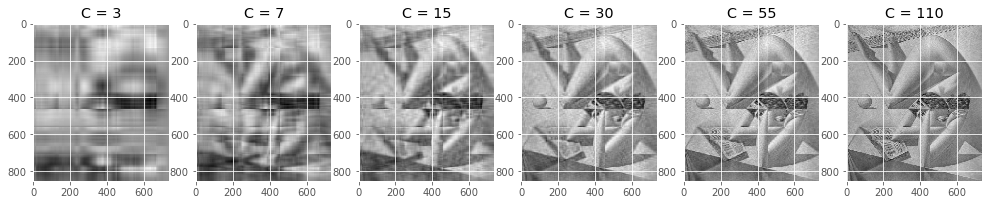

In [198]:
fig, axes = plt.subplots(1, 6, figsize=(17, 8), facecolor='w', edgecolor='k')
axes = axes.ravel()
PCs = [3, 7, 15, 30, 55, 110]
for i, C in enumerate(PCs):
    axes[i].imshow(np.dot(U[:, :C]*s[:C], V[:C]), cmap = 'gray')
    axes[i].set_title('C = {}'.format(C))

0.841642827876


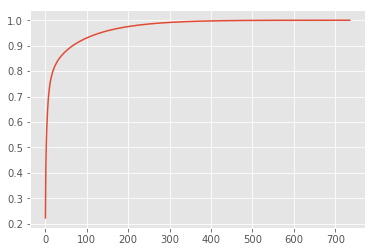

In [195]:
var_exp_ratio = []
for i in range(0, img.shape[1]):
    var_exp_ratio.append(s[i]**2 / sum(s**2))
cum_exp = np.cumsum(var_exp_ratio)
print(cum_exp[30])
plt.plot(cum_exp);

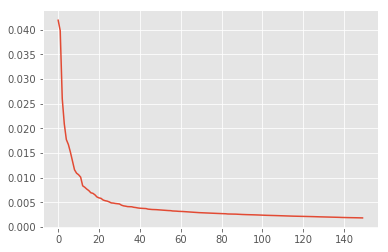

In [197]:
plt.plot(s[:150]/np.sum(s));

Порог отсечения числа компонент должен быть выбран в той части графика, где он становится пологим, а число PCA ещё не слишком велико. Останавливаемся, когда дополнительная PC перестаёт добавлять много объяснённой дисперсии. В зависимости от стоящей задачи "достаточно хорошим" качеством восстановления может быть как, скажем, 60%, так и 90%. 
Допустим, возьмём 30 главных компонент, которые объясняют 84+% вариации. Посмотрим, во сколько раз изменится занимаемый объём памяти. 

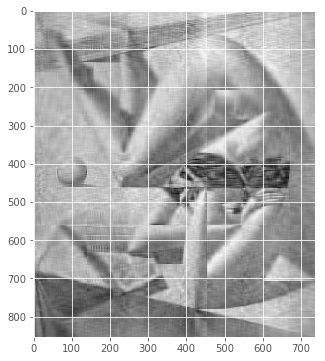

In [199]:
plt.figure(figsize=(14,6))
plt.imshow(np.dot(U[:, :30]*s[:30], V[:30]), cmap = 'gray');

Преобразуем элементы исходной матрицы в float64, чтобы они и элементы новой матрицы не отличались по типу и занимаемому месту. Исходная матрица имеет размер (853, 736), то есть в ней всего 627808 элементов, а после преобразования и выбора первых 30 PC мы должны хранить в памяти U размером 853 x 30, V размером 30 x 736, s размером 30 x 1. Получается, все элементы исходной матрицы будут весить 627808 $\ast$ 8 = 5022464 байт, а все элементы U, s, V для 30 PC будут весить (853 x 30 + 30 x 736 + 30) $\ast$ 8 = 381600 байт. Кроме того, хранение np.ndarray с несколькими строками занимает 112 байт, а хранение np.ndarray с одной строкой -- 96 байт, поэтому вес img будет 5022464 + 112 = 5022576 байт, а вес первых 30 ГК -- 381920 + 112 + 112 + 96 = 381920 байт

При работе со сторонними пакетами (например, с объектами из numpy) sys.getsizeof даёт вес только самого объекта как указателя на хранящиеся в нём элементы, а не веса этих элементов:

In [117]:
sys.getsizeof(U[:, :30]), sys.getsizeof(s[:30]), sys.getsizeof(V[:, :30])

(112, 96, 112)

Следующее преобразование позволит найти вес объектов вместе с содержимым

In [115]:
U1 = U[:, :30].astype('float64')
V1 = V[:30].astype('float64')
s1 = s[:30].astype('float64')
img = img.astype('float64')

In [116]:
sys.getsizeof(img), sys.getsizeof(V1) + sys.getsizeof(U1) + sys.getsizeof(s1)

(5022576, 381920)

In [120]:
round( sys.getsizeof(img) / (sys.getsizeof(V1) + sys.getsizeof(U1) + sys.getsizeof(s1)), 5)

13.15086

Потребуется в 13 раз меньше места для хранения (30 PC)

## PCA

>Рассмотрим нелиненый датасет. Попробуем решить задачу классификации, используя представление точек, полученнуе с помощью различных версий PCA.

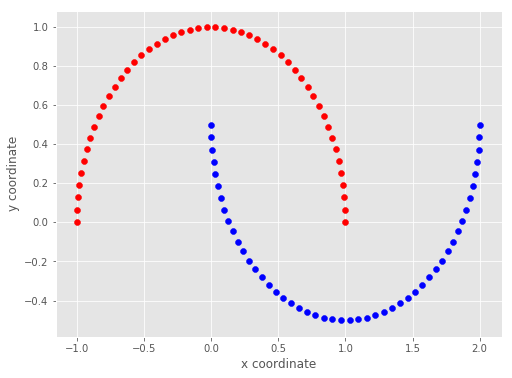

In [59]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=654)

plt.figure(figsize=(8,6))

plt.scatter(X[y==0, 0], X[y==0, 1], color='red')
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue')


plt.ylabel('y coordinate')
plt.xlabel('x coordinate')

plt.show()

### Linear PCA

>**7. (1 балл)** 

>Постройте графики, полученные проекцией на одну и две главные компоненты. Сохраняйте цвет для разных классов. 


In [60]:
from sklearn.decomposition import PCA

pca_1 = PCA(n_components = 1)
pca_2 = PCA(n_components = 2)
X_pca_1 = pca_1.fit_transform(X)
X_pca_2 = pca_2.fit_transform(X)

Проекция на одну главную компоненту (в старых осях):

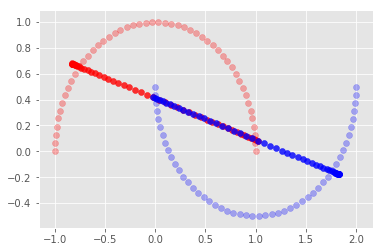

In [61]:
X_new = pca_1.inverse_transform(X_pca_1)

plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha = .3)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha = .3)
plt.scatter(X_new[y==0, 0], X_new[y==0, 1], color='red', alpha = .8)
plt.scatter(X_new[y==1, 0], X_new[y==1, 1], color='blue', alpha = .8);

Проекция на одну главную компоненту (по оси x -- новая компонента, мы к новой оси, это одномерное пр-во):

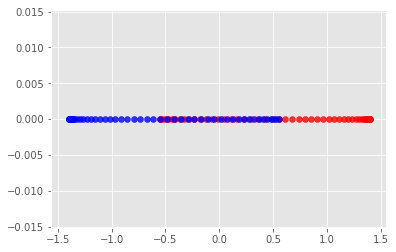

In [62]:
plt.scatter(X_pca_1[y == 0, 0], np.zeros(len(X_new[y == 0])), color='red', alpha = .8)
plt.scatter(X_pca_1[y == 1, 0], np.zeros(len(X_new[y == 1])), color='blue', alpha = .8)

Проекция на две главные компоненты (в старых осях):

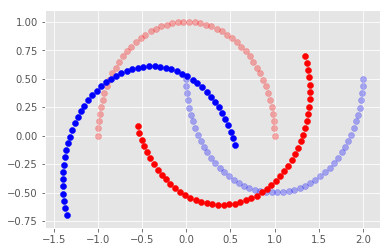

In [63]:
plt.scatter(X[y==0, 0], X[y==0, 1], color='r', alpha = .3)
plt.scatter(X[y==1, 0], X[y==1, 1], color='b', alpha = .3)
plt.scatter(X_pca_2[y==0, 0], X_pca_2[y==0, 1], color = 'r')
plt.scatter(X_pca_2[y==1, 0], X_pca_2[y==1, 1], color = 'b');

### RBF PCA

>**8. (0.5 балла)** 
Допишите в месте "Your code here" построение матрицы Грамма для RBF ядра, с параметром gamma. Обратите внимание, что выше в коде уже получена матрица попарных расстояний sq_dists

In [64]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

In [65]:
def stepwise_kpca(X, gamma, n_components):
    """
    X: A MxN dataset as NumPy array where the samples are stored as rows (M), features as columns (N).
    gamma: coefficient for the RBF kernel.
    n_components: number of components to be returned.

    """
    # Calculating the squared Euclidean distances for every pair of points
    # in the MxN dimensional dataset.
    sq_dists = pdist(X, 'sqeuclidean')

    # Converting the pairwise distances into a symmetric MxM matrix.
    mat_sq_dists = squareform(sq_dists)

    K = np.exp(-gamma * mat_sq_dists)

    # Centering the symmetric NxN kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # Obtaining eigenvalues in descending order with corresponding
    # eigenvectors from the symmetric matrix.
    eigvals, eigvecs = eigh(K)

    # Obtaining the i eigenvectors that corresponds to the i highest eigenvalues.
    X_pc = np.column_stack((eigvecs[:,-i] for i in range(1,n_components+1)))

    return X_pc

>**9. (2 балл)**  
Постройте графики, полученные проекцией на одну и две главные компоненты. Сохраняйте цвет для разных классов. Подберите такой параметр gamma, что выборка стала линейно разделимой.

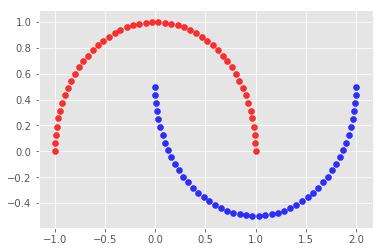

In [66]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], color = 'r', alpha = .8)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', alpha = .8);

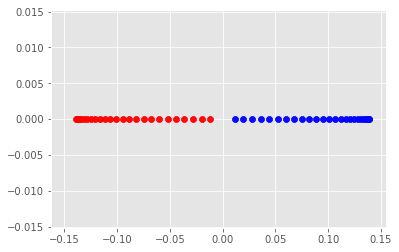

In [67]:
X_rbf_1 = stepwise_kpca(X, gamma = 70, n_components = 2)

plt.scatter(X_rbf_1[y == 0, 0], np.zeros(len(X_rbf_1[y == 0])), color='r', alpha = .8)
plt.scatter(X_rbf_1[y == 1, 0], np.zeros(len(X_rbf_1[y == 0])), color='b', alpha = .8);

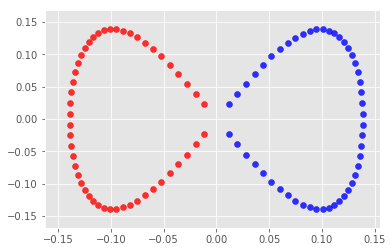

In [68]:
X_rbf_2 = stepwise_kpca(X, gamma = 70, n_components = 2)

plt.scatter(X_rbf_2[y == 0, 0], X_rbf_2[y == 0, 1], color='r', alpha = .8)
plt.scatter(X_rbf_2[y==1, 0], X_rbf_2[y==1, 1], color='b', alpha = .8);

>### Ваши мысли о задании:

> ### Здесь можете поделиться картинкой

![alt text](drcox.jpg "Dr. Cox")